In [2]:
import pandas as pd

In [135]:
X = pd.read_csv('train.csv', header=None)
y = pd.read_csv('train-target.csv', header=None)
test = pd.read_csv('test.csv', header=None)

In [4]:
data = pd.read_csv('sample-submission.csv', header=None)

In [80]:
X_train.shape, test.shape, y_train.shape

((10000, 30), (2000, 30), (10000, 1))

In [5]:
X_normalized = (X - X.mean())/ X.std()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=42, test_size=0.33)

In [7]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

scores = []
coef = []
for alpha in range(1, 10, 1):
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    scores.append(mse_score)
    coef.append(alpha)
index = np.array(scores).argmin()
answer1 = coef[index]
answer2 = round(scores[index], 3)

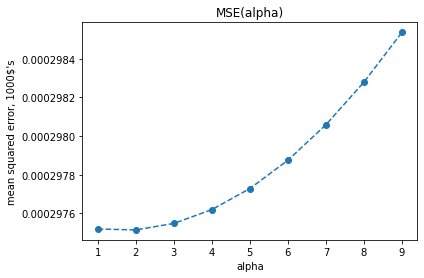

In [178]:
from matplotlib import pyplot as plt

plt.plot(coef, scores, '--o')
plt.title("MSE(alpha)")
plt.xlabel("alpha")
plt.ylabel("mean squared error, 1000$'s")
plt.show()

In [8]:
model = Ridge(alpha=2, random_state=42)
model.fit(X, y)
y_pred = model.predict(test)

In [9]:
y_pred

array([[0.67827396],
       [0.5611395 ],
       [0.83511685],
       ...,
       [0.86347318],
       [0.24379949],
       [0.26778553]])

In [15]:
np.savetxt(r'1111.csv',y_pred ,delimiter=',', fmt=( '%s'))

In [155]:
np.savetxt("foo.csv", y_pred)

In [156]:
df = pd.read_csv('foo.csv', header=None)

In [157]:
df

,0
0,0.678274
1,0.561139
2,0.835117
3,1.047060
4,0.369791
...,...
1995,0.450946
1996,0.028893
1997,0.863473
1998,0.243799


# Вариант 2

In [16]:
from sklearn.linear_model import Lasso

model2 = Lasso(random_state=42)
model2.fit(X, y)
y_pred2 = model2.predict(test)

In [17]:
y_pred2

array([0.3514813 , 0.54476713, 0.38840675, ..., 0.50327942, 0.40574361,
       0.47647317])

In [18]:
np.savetxt(r'1111.csv',y_pred2 ,delimiter=',', fmt=( '%s'))

# Вариант 3

In [20]:
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def get_score(model_cls, **kwargs):
    model = model_cls(**kwargs)
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred)
    return score

score_knn = get_score(KNeighborsClassifier)
score_logistic_regression = get_score(LogisticRegression, random_state=42)

def get_best_score(score_knn, score_logistic_regerssion):
    if score_knn > score_logistic_regression:
        model_name = "K Nearest Neighbors"
        answer = round(score_knn, 3)
    else:
        model_name = "Logistic Regression"
        answer = round(score_logistic_regression, 3)
    return model_name, answer

model_name, answer4 = get_best_score(score_knn, score_logistic_regression)
print("best score: %s" % model_name)

best score: Logistic Regression


In [22]:
model3 = LogisticRegression()
model.fit(X, y)
y_pred3 = model.predict(test)

In [47]:
preds = pd.DataFrame(y_pred3)
preds.to_csv('preds.csv', header=False, index=False)

# Вариант 4

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

models = [Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor]
model_names = ['Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

def estimate_model(model_cls):
    model = model_cls(random_state=42)
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    return score

regression_scores = []
for model_cls in models:
    score = estimate_model(model_cls)
    regression_scores.append(score)

index = np.array(regression_scores).argmin()
answer3 = regression_scores[index]
print("best score: %s" % model_names[index])

best score: RandomForestRegressor


In [49]:
model4 = RandomForestRegressor(max_depth=2, random_state=42)
model4.fit(X, y.values.ravel())
y_pred4 = model4.predict(test)

In [50]:
preds = pd.DataFrame(y_pred4)
preds.to_csv('preds.csv', header=False, index=False)

#### RandomForestRegressor дает 0.508

In [29]:
model5 = GradientBoostingRegressor()
model5.fit(X_train, y_train.values.ravel())
y_pred5 = model4.predict(test)

In [139]:
y_pred5

array([1., 1., 1., ..., 1., 0., 0.])

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_normalized = scaler.fit_transform(X_train)

array([[-0.70463053, -0.79578006,  0.60896913, ...,  0.39969855,
        -0.38396027,  0.54217484],
       [-0.06455671, -0.09115055, -0.81088361, ..., -0.33520811,
        -0.52620811,  0.04997307],
       [ 0.34234406,  1.52286369, -0.73705382, ..., -1.1945158 ,
        -1.07859518, -1.08509847],
       ...,
       [-0.58966989, -0.83865644, -1.43391406, ..., -0.57211261,
        -2.06984362,  1.21044577],
       [-0.84899427,  0.61069547, -1.16077373, ..., -0.09116208,
         0.01923857,  1.10987307],
       [-2.35249939, -1.54766372,  0.05437627, ...,  1.53236655,
        -0.69154005,  0.82991362]])

In [35]:
model4 = RandomForestRegressor(max_depth=2, random_state=42)
model4.fit(X_train, y_train.values.ravel())
y_pred4 = model4.predict(test)

In [36]:
y_pred4

array([1., 1., 1., ..., 1., 1., 1.])

array([[ 6.44292510e+13],
       [ 1.80712504e+13],
       [ 4.50475188e+13],
       ...,
       [-1.04042000e+14],
       [-2.70762220e+13],
       [-1.36951221e+14]])

((6700, 1), (6700, 30))

# K ближайших дает 0.72

In [40]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X, y.values.ravel())

expected = y
predicted = model.predict(test)
pp = model.predict_proba(test)

In [46]:
predicted.shape

(2000,)

In [45]:
np.savetxt(r'11111.csv', predicted ,delimiter=',', fmt=( '%s'))

In [51]:
preds = pd.DataFrame(predicted)
preds.to_csv('preds.csv', header=False, index=False)

### Попробую поднять

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [64]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 15)}

In [65]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [66]:
knn_grid.fit(X_train, y_train.values.ravel())
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   16.6s finished


({'knn__n_neighbors': 11}, 0.9947761194029852)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_grid.predict(X_test))

0.9945454545454545

knn = 11

In [68]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
ss = StandardScaler()

In [72]:
x_ss = ss.fit_transform(X)

In [74]:
knn.fit(x_ss, y.values.ravel())
predicted = knn.predict(test)

In [119]:
preds = pd.DataFrame(predicted)
preds.to_csv('preds.csv', header=False, index=False)

In [120]:
y1 = 0.72
(40 + (y1 - 0.6) / 0.22 * 60 if y1 > 0.6 else 0)

72.72727272727272

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

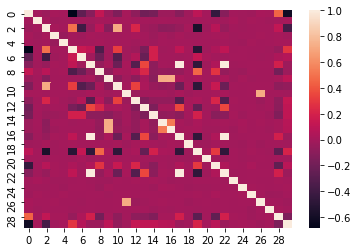

In [99]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix)

Попробовать удалить 9 и 15 столбцы


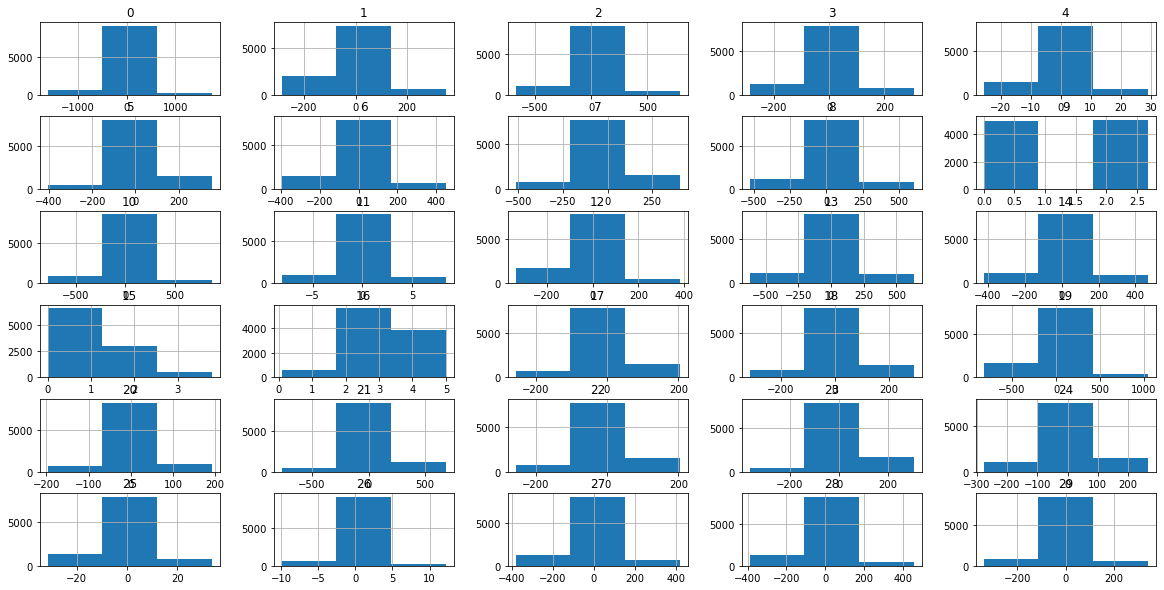

In [126]:
hist = X.hist(bins=3, figsize=(20,10))